# t-SNE
*T-Distribution Stochastic Neighbor Embedding* is an algorithm to gather high dimensional data points and visualize them in space, being able to determine which ones are closer and father appart.

## Imports

In [276]:
# Basics
import pandas as pd
import numpy as np

# t-SNE
from sklearn.manifold import TSNE

# Plot
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset
Let's import a created high dimensional dataset to test the t-SNE algorithm. 
We will create a dataset with a product category and many attributes associated to it and see if the algorithm is capable of putting them together.

In [263]:
#data
path = '/content/Food.csv'
df = pd.read_csv(path)

In [264]:
print('Shape:' , df.shape)
print('-----------')
df.head()

Shape: (150, 5)
-----------


,product,brand,type,size,organic
0,p1,A,diet,5,0
1,p2,C,diet,8,0
2,p3,D,salty,25,1
3,p4,E,candy,8,0
4,p5,B,diet,6,0


We have 50 different products and 25 variables indicating a given feature of those producs. So, in other terms, each product can be understood as a vector. 

Let's see how t-SNE behaves grouping them.

In [271]:
# I want two components, so I can plot them in a 2D graphic
n_components = 2

# Data
X = pd.get_dummies(df.drop(['product'], axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/li

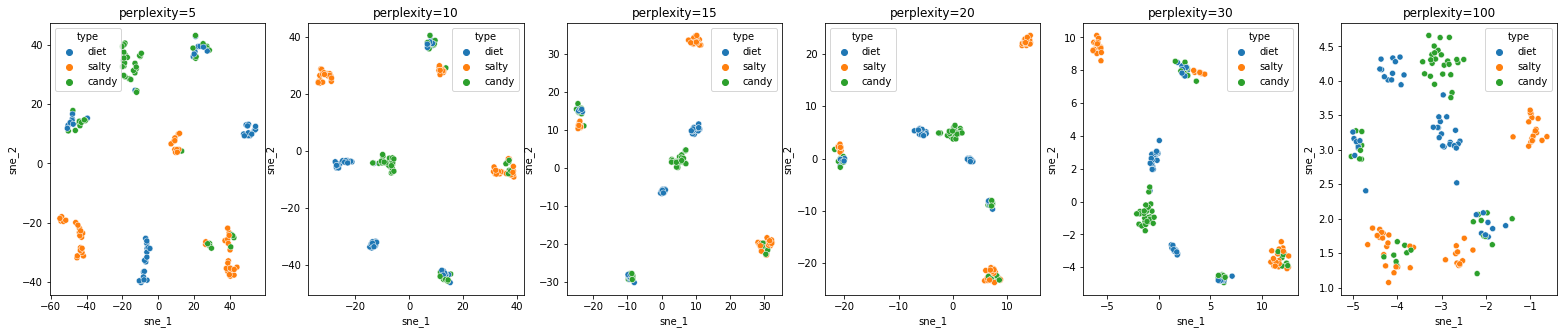

In [320]:
# Setup grid
fig, ax = plt.subplots(1,6, figsize=(27,5))

# Loop
for i, p in enumerate( [5, 10, 15, 20, 30, 100] ):
  # Run t-SNE
  t_sne = TSNE(n_components=n_components,
              perplexity=p,
              random_state=12)
  
  # Calculate Matrix
  matrix_fit = t_sne.fit_transform(X)

  # Gather products and SNE transformation
  df['sne_1'] = matrix_fit[:,0]
  df['sne_2'] = matrix_fit[:,1]
  g = sns.scatterplot(data=df, x='sne_1', y='sne_2', hue='type', ax=ax[i])
  g.set_title(f'perplexity={p}');


In [319]:
# Run t-SNE
t_sne = TSNE(n_components=n_components,
              perplexity=10,
              random_state=12)
  
# Calculate Matrix
matrix_fit = t_sne.fit_transform(X)

# Gather products and SNE transformation
df['sne_1'] = matrix_fit[:,0]
df['sne_2'] = matrix_fit[:,1]


# Plot scatterplot
fig = px.scatter(x='sne_1', y='sne_2', color='type', hover_data=['product', 'type', 'brand', 'size', 'organic'], text='brand',
           data_frame=df)
fig.update_traces(marker={'size': 18, 'opacity': 0.7})
fig.update_layout(height=800, width=800)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## High Dimensional global variance data

In [334]:
df2 = pd.DataFrame([np.random.random(size=150)]*50)
df2['groups'] = np.random.randint(1,4, size=50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support na

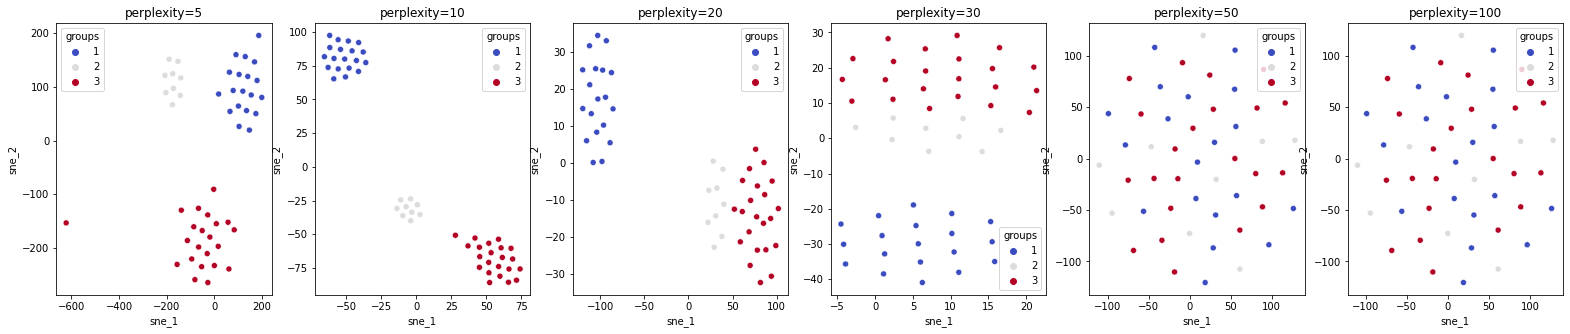

In [335]:
# Setup grid
fig, ax = plt.subplots(1,6, figsize=(27,5))

# Loop
for i, p in enumerate( [5, 10, 20, 30, 50, 100] ):
  # Run t-SNE
  t_sne = TSNE(n_components=2,
              perplexity=p,
              random_state=12)
  
  # Calculate Matrix
  matrix_fit = t_sne.fit_transform(df2)

  # Gather products and SNE transformation
  df2['sne_1'] = matrix_fit[:,0]
  df2['sne_2'] = matrix_fit[:,1]
  g = sns.scatterplot(data=df2, x='sne_1', y='sne_2', hue='groups', palette='coolwarm', ax=ax[i])
  g.set_title(f'perplexity={p}');